Homework 1
==========

## Question 1

*Consider the following cell lineage model: a stem cell population, $x_1$, can differentiate into two progenitor cell populations, $x_2$ and $x_3$, which each differentiate further into a terminal cell population, $x_4$ or $x_5$, respectively.*

*This model is defined by the following set of differential equations:*

$$x'_1 = a_1x_1(1 − x_1 − 0.1x_2 − 0.1x_3) − c_1x_1$$
$$x'_2 = 0.5c_1x_1 − e_1x_2$$
$$x'_3 = e_1x_2 − 0.9x_3$$
$$x'_4 = 0.5c_1x_1 − 0.6x_4$$
$$x'_5 = x_4 − 0.1x_5$$

*where the parameters ($a_1, c_1, e_1$) lie in the range [0, 3].*

*a) Describe the meaning of each term in the first equation (for $x'_1$).*

* $x_1'$: the change in the population size of $x_1$
* $a_1x_1$: the increase in population size of of $x_1$, regulated by some parameter $a_1$
* $(1-x_1-0.1x_2-0.1x_3)$: the inhibition on $x_1$. If this expression were to evaluate to 1 (meaning $-x_1-0.1x_2-0.1x_3 = 0$), that would mean that there is no inhibition on $x_1$ and the population size will change only as a result of differentiation. In reality, the change in population size of $x_1$ is influenced strongly by the current population size of $x_1$ as well as more weakly by the population sizes of $x_2$ and $x_3$.
* $-c_1x_1$: the decrease in population size of $x_1$ as a result of differentiation into $x_2$ and $x_4$, based on some parameter $c_1$

*b) Create a model of this system in Julia, given input parameters ($a_1, c_1, e_1$) and initial conditions. Demonstrate that the model can take different input parameter values.*

In [7]:
using Catalyst
using OrdinaryDiffEq

In [8]:
stemCellModel = @reaction_network begin
    a₁ * (1 - x₁ - 0.1x₂ - 0.1x₃), x₁ --> 2x₁
    0.5c₁, x₁ --> x₂
    e₁, x₂ --> x₃
    0.9, x₃ --> ∅
    0.5c₁, x₁ --> x₄
    1.0, x₄ --> x₅
    -0.4, x₄ --> ∅
    0.1, x₅ --> ∅
end

convert(ODESystem, stemCellModel)

Model ##ReactionSystem#247 with 5 equations
Unknowns (5):
  x₁(t)
  x₂(t)
  x₃(t)
  x₄(t)
⋮
Parameters (3):
  a₁
  c₁
  e₁

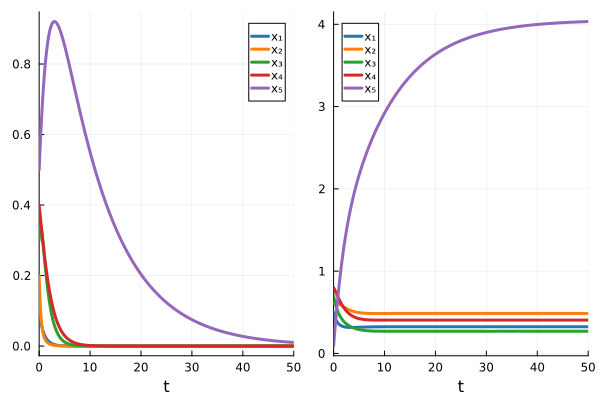

In [9]:
using Plots

initConditionsA = [:x₁ => 0.1, :x₂ => 0.2, :x₃ => 0.3, :x₄ => 0.4, :x₅ => 0.5]
paramsA = [:a₁ => 1.0, :c₁ => 2.0, :e₁ => 3.0]
initConditionsB = [:x₁ => 0.5, :x₂ => 0.6, :x₃ => 0.7, :x₄ => 0.8, :x₅ => 0.09]
paramsB = [:a₁ => 2.5, :c₁ => 1.5, :e₁ => 0.5]
timeSpan = (0.0, 50.0)

odeA = ODEProblem(stemCellModel, initConditionsA, timeSpan, paramsA)
odeB = ODEProblem(stemCellModel, initConditionsB, timeSpan, paramsB)
solA = solve(odeA, Tsit5())
solB = solve(odeB, Tsit5())

# TODO - title

plots = []
push!(plots, plot(solA, palette=:tab10))
push!(plots, plot(solB, palette=:tab10))
plot!(plots..., linewidth=3)

*c) Simulate the model using DifferentialEquations.jl for numerically integration, Simulate this model in the time range $t \in [0, 50]$ for $a_1 = 0.9, c_1 = 0.1, e_1 = 0.5$ and initial conditions $x_1(t_0) = 0.4, x_2(t_0) = x_3(t_0) = 0.2, x_4(t_0) = x_5(t_0) = 0$. Which species dominate as the system reaches steady state?*

[:x₁ => 0.4, :x₂ => 0.2, :x₃ => 0.2, :x₄ => 0.0, :x₅ => 0.0]


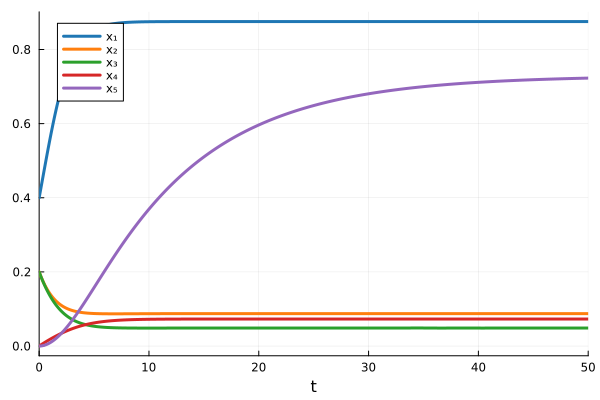

In [10]:
initConditions = [:x₁ => 0.4, :x₂ => 0.2, :x₃ => 0.2, :x₄ => 0.0, :x₅ => 0.0]
println(initConditions)
params = [:a₁ => 0.9, :c₁ => 0.1, :e₁ => 0.5]
timeSpan = (0.0, 50.0)
ode = ODEProblem(stemCellModel, initConditions, timeSpan, params)
sol = solve(ode, Tsit5())
plot(sol, palette=:tab10, linewidth=3)

We see that species $x₁$ and $x₅$ dominate. Since $a₁$ is relatively high (0.9), there's a high rate of regeneration for $x_1$, and $c_1$, which impacts the differentiation rate of $x_1$ is low (0.1), meaning only 10% of $x_1$ is converted to $x_2$ and $x_4$ at each time step.
$x_5$ is high since much of $x_4$ is converted to $x_5$, but very little (10%) of $x_5$ decays. In contrast, only 50% of $x_2$ is converted to $x_3$ and 90% of $x_3$ decays at each time step, so we see small very small population sizes for $x_2$ and $x_3$ after just a few time steps.

## Question 2
*Can this system be solved at steady state analytically, i.e. in terms of the parameters $a_1, c_1, e_1$? Why? Solve this system using symbolic computation in Julia. How many ﬁxed points does the model permit? What constraints on the parameters are required to ensure that x1 will reach a positive value at steady state?*

Yes, this system can be solved analytically (i.e. the parameters can be solved individually, not in terms of each other). We can see that using $x'_3 = e_1x_2 − 0.9x_3$, we can solve for $e_1$ without using any other parameters; similarly, $x'_4 = 0.5c_1x_1 − 0.6x_4$ can be used to solve for $c_1$. To solve for $a_1$, we can use $x'_1 = a_1x_1(1 − x_1 − 0.1x_2 − 0.1x_3) − c_1x_1$ and substitute in the solution for $c_1$. Thus, all the parameters can be solved for analytically.

In [11]:
using SymPy

a₁, c₁, e₁ = SymPy.@syms a₁ c₁ e₁
x₁, x₂, x₃, x₄, x₅ = SymPy.@syms x₁ x₂ x₃ x₄ x₅

rhs = [a₁ * x₁ * (1 - x₁ - 0.1x₂ - 0.1x₃) - c₁ * x₁,
    0.5 * c₁ * x₁ - e₁ * x₂,
    e₁ * x₂ - 0.9 * x₃,
    0.5 * c₁ * x₁ - 0.6 * x₄,
    x₄ - 0.1 * x₅]

fps = SymPy.solve(rhs, [x₁, x₂, x₃, x₄, x₅])

J = rhs.jacobian([x₁, x₂, x₃, x₄, x₅]);
J

5×5 Matrix{SymPyCore.Sym{PyCall.PyObject}}:
 -a₁*x₁ + a₁*(-x₁ - 0.1*x₂ - 0.1*x₃ + 1) - c₁  …                   0
                                       0.5*c₁                      0
                                            0                      0
                                       0.5*c₁                      0
                                            0     -0.100000000000000

In [12]:
# substitute fixed point values
nfp_1 = 1
J_fp_1 = J.subs([(x₁, fps[nfp_1][1]), (x₂, fps[nfp_1][2]), (x₃, fps[nfp_1][3]), (x₄, fps[nfp_1][4]), (x₅, fps[nfp_1][5])])

J_fp_solved_1 = J_fp_1.subs([(a₁, 0.9), (e₁, 0.5), (c₁, 0.1)])

# calculate eigenvalues
eigs_1 = J_fp_solved_1.eigenvals()

# find stability of fixed point
is_stable = false
if maximum(real(collect(keys(eigs_1)))) < 0
    is_stable = true
end
is_stable

false

In [13]:
# substitute fixed point values
nfp_2 = 2
J_fp_2 = J.subs([(x₁, fps[nfp_2][1]), (x₂, fps[nfp_2][2]), (x₃, fps[nfp_2][3]), (x₄, fps[nfp_2][4]), (x₅, fps[nfp_2][5])])

J_fp_solved_2 = J_fp_2.subs([(a₁, 0.9), (e₁, 0.5), (c₁, 0.1)])

# calculate eigenvalues
eigs_2 = J_fp_solved_2.eigenvals()

# find stability of fixed point
is_stable = false
if maximum(real(collect(keys(eigs_2)))) < 0
    is_stable = true
end
is_stable

true

In [14]:
using Latexify
latexify(fps)

"\\begin{equation}\n\\left[\n\\begin{array}{c}\n\\left[\n\\begin{array}{c}\n0.0 \\\\\n0.0 \\\\\n0.0 \\\\\n0.0 \\\\\n0.0 \\\\\n\\end{array}\n\\right] \\\\\n\\left[\n\\begin{array}{c}\n\\frac{180.0 \\cdot e_1 \\cdot \\left( a_1 - c_1 \\right)}{a_1 \\cdot \\left( 10.0 \\cdot c_1 \\cdot e_1 + 9.0 \\cdot c_1 + 180.0 \\cdo" ⋯ 404 bytes ⋯ "_1 \\cdot e_1 + 9.0 \\cdot c_1 + 180.0 \\cdot e_1 \\right)} \\\\\n\\frac{1500.0 \\cdot c_1 \\cdot e_1 \\cdot \\left( a_1 - c_1 \\right)}{a_1 \\cdot \\left( 10.0 \\cdot c_1 \\cdot e_1 + 9.0 \\cdot c_1 + 180.0 \\cdot e_1 \\right)} \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

There are 2 fixed points for this model. The trivial fixed point is not stable, while the non-trivial fixed point is stable.

To ensure that $x_1$ is positive at steady state, we look at the value of $x_1$ at the stable fixed point. This value is $\frac{180e_1(a_1−c_1)}{a_1(10c_1e_1+9c_1+180e_1)}$. So long as $a_1 > c_1$ and $a_1, c_1 > 0$, in addition to the given constraints that $a_1, c_1, e_1 \in [0, 3]$ this value will be positive (and non-zero).

## Question 3
*The question of whether more than one steady state can be reached for a given set of parameter values (multistability) can be investigated numerically by performing a sweep through a range of initial conditions. Write a script to simulate the model for diﬀerent sets of **initial conditions** (at least 100) in the range $x_i \in [0, 1]$ and analyze the results. Plot the results (you may need to think carefully about the best way to visualize them). Do you ﬁnd evidence for multistability? Describe approximately the critical initial condition thresholds, if they exist. Discuss brieﬂy what strategies could be used to investigate whether this model permits multistability.*

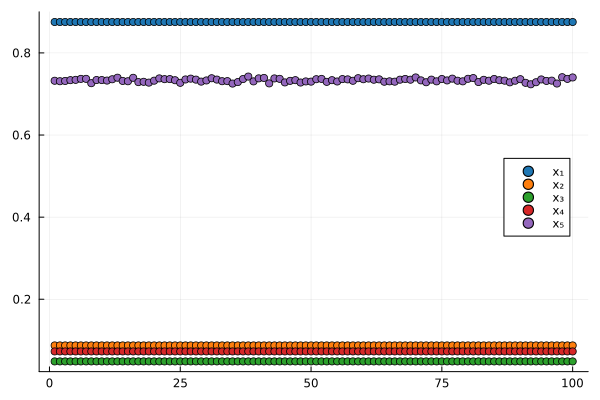

In [15]:
randInitConditions = rand(Float64, (100, 5))

params = [:a₁ => 0.9, :c₁ => 0.1, :e₁ => 0.5]
timeSpan = (0.0, 50.0)
populations = [:x₁, :x₂, :x₃, :x₄, :x₅]

endVals = [[], [], [], [], []]

for i = 1:100
    conditions = Dict(populations .=> randInitConditions[i, :])
    ode = ODEProblem(stemCellModel, conditions, timeSpan, params)
    sol = solve(ode, Tsit5())

    for j in 1:5
        push!(endVals[j], sol[end][j])
    end
end

scatter(legend=:right, palette=:tab10)
for j in 1:5
    scatter!(endVals[j], label=String(populations[j]))
end
scatter!()


There does not appear to be any evidence for multistability. Given 100 different random initial conditions for the cell populations, they all converge to the same end values. This suggests that these end values are the only stable values for this system under the given parameters. If there were multistability, we would expect to see instances where the ending population sizes are at different levels than from other trials; however, in every single instance, the ending population sizes are about the same. Each population has a small level of variation (with $x_5$'s variation being the greatest and most visible given the plot's scale), but in overall the populations all converge upon a single steady state.

For critical conditions, we require that $x_1$ not be zero. If $x_1$ is 0, there may be small changes to the populations of $x_1$, $x_2$, $x_3$, and $x_4$, but in the end all populations converge to 0. This is trivially stable, but if we only care about the end state of convergence where there are still some cell populations, we would require that $x_1 \neq 0$. 

TODO - critical conditions: start cannot be zero

We only investigate differences in initial conditions. It would be interesting to look into how different parameters affect stability. Bifurcation analysis would allow us to see whether the parameters $a_1, c_1, e_1$ could impact steady states and allow for multistability.

## Question 4
*Choose a feedback motif that was presented in the Network Motifs paper discussed in class (Alon, 2007). Give a biological system that represents an example of this type of feedback motif. Explain the role of each of the variables/species in the system. Write down a model of this system described by differential equations. Explain your reasoning for the form of each equation. Choose a set of initial conditions and parameter and simulate this model numerically in Julia. Discuss its behavior for different choices of **parameters**. What type of transient and equilibria behaviors does this model display? Could it permit oscillations? Could it permit multistability? Shows plots to explain your reasoning. You are expected to write a short report (2-3 paragraphs) to discuss your investigations and the conclusions you draw.*



In [147]:
using Catalyst
using DifferentialEquations
using Plots

@parameters t, r_x, r_y, n_x, n_y, γ_x, γ_y, β_x, β_y
@variables x(t), y(t), z(t)

coherent_ff_rn = @reaction_network begin
    # 1.0, ∅ --> x
    (r_x * x^n_x) / (γ_x^n_x + x^n_x) - β_x, ∅ --> x
    (r_y * y^n_y) / (γ_y^n_y + y^n_y) - β_y, ∅ --> y
    ((r_x * x^n_x) / (γ_x^n_x + x^n_x)) * ((r_y * y^n_y) / (γ_y^n_y + y^n_y)), ∅ --> z
end

convert(ODESystem, coherent_ff_rn)

Model ##ReactionSystem#1231 with 3 equations
Unknowns (3):
  x(t)
  y(t)
  z(t)
Parameters (8):
  r_x
  n_x
  γ_x
  β_x
⋮

In [211]:
u0 = [x => 1.0, y => 0.0, z => 0.0]

params = [r_x => 1.0, r_y => 1.0, n_x => 5.0, n_y => 5.0, γ_x => 1.0, γ_y => 1.0, β_x => 1.0, β_y => 1.0]

tspan = (0.0, 30.0)

# Create the ODE problem
prob = ODEProblem(coherent_ff_rn, u0, tspan, params)

sol = solve(prob, R())

plot(sol, title="AND Gate", xlabel="Time", legend=true)


UndefVarError: UndefVarError: `R` not defined

In [154]:
using Catalyst
using DifferentialEquations
using Plots

# Define the model variables (species)
@parameters t
@variables cAMP(t), arabinose(t), CRP(t), AraC(t), Z(t)
@parameters γ_cAMP, n_cAMP, r_cAMP, γ_arabinose, n_arabinose, r_arabinose, β_CRP, β_AraC, r_CRP, n_CRP


# Define the reaction network
rn = @reaction_network begin

    # cAMP --> CRP activation
    (r_cAMP * cAMP^n_cAMP) / (γ_cAMP^n_cAMP + cAMP^n_cAMP) - β_CRP * CRP, ∅ --> CRP

    # CRP --> AraC activation
    (r_CRP * CRP^n_CRP) / (γ_CRP^n_CRP + CRP^n_CRP) - β_AraC * AraC, ∅ --> AraC

    # arabinose --> AraC activation
    (r_arabinose * arabinose^n_arabinose) / (γ_arabinose^n_arabinose + arabinose^n_arabinose) - β_AraC * AraC, ∅ --> AraC

    # CRP AND AraC activates Z
    ((cAMP^n_cAMP) / (γ_cAMP^n_cAMP + cAMP^n_cAMP)) * ((arabinose^n_arabinose) / (γ_arabinose^n_arabinose + arabinose^n_arabinose)), ∅ --> Z

    (0, 0), ∅ <--> cAMP
    (0, 0), ∅ <--> arabinose
end

convert(ODESystem, rn)


Model ##ReactionSystem#1268 with 5 equations
Unknowns (5):
  CRP(t)
  AraC(t)
  Z(t)
  cAMP(t)
⋮
Parameters (11):
  r_cAMP
  n_cAMP
  γ_cAMP
  β_CRP
⋮

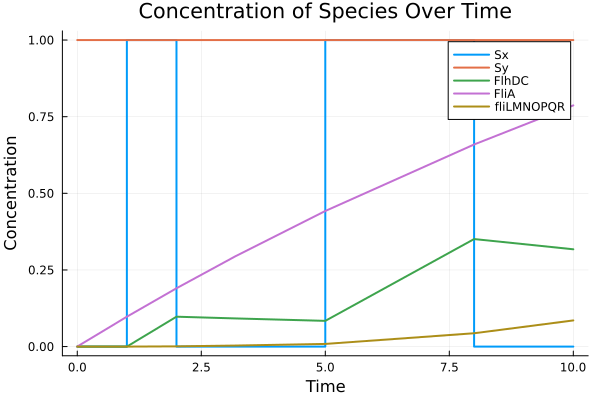

In [231]:
using Catalyst
using DifferentialEquations
using Plots

# Define species and reactions
@parameters t
@variables FlhDC(t) FliA(t) fliLMNOPQR(t) Sx(t) Sy(t)
@parameters k1 k2 k3 d1 d2 d3

# Define reactions with zero rates for constitutive expression
rxs = @reaction_network begin
    (0, 0), 0 ↔ Sx                   # Sx constitutively expressed at a constant level
    (0, 0), 0 ↔ Sy                   # Sy constitutively expressed at a constant level
    k1 * Sx, 0 → FlhDC               # Sx activates FlhDC
    k2 * Sy, 0 → FliA                # Sy activates FliA
    k3 * FlhDC * FliA, 0 → fliLMNOPQR # AND gate: FlhDC and FliA activate fliLMNOPQR
    d1, FlhDC → 0                    # Degradation of FlhDC
    d2, FliA → 0                     # Degradation of FliA
    d3, fliLMNOPQR → 0               # Degradation of fliLMNOPQR
end # k1 k2 k3 d1 d2 d3

# Initial conditions and parameters
u0 = [Sx => 0.0, Sy => 1.0, FlhDC => 0.0, FliA => 0.0, fliLMNOPQR => 0.0]
p = [k1 => 0.1, k2 => 0.1, k3 => 0.1, d1 => 0.05, d2 => 0.05, d3 => 0.05]

# Define condition for the callback (times when input changes)
condition1(u, t, integrator) = abs(t - 1.0) < 1e-3  # First spike at t=1
condition2(u, t, integrator) = abs(t - 2.0) < 1e-3  # End of first spike at t=2
condition3(u, t, integrator) = abs(t - 5.0) < 1e-3  # Second spike at t=5
condition4(u, t, integrator) = abs(t - 8.0) < 1e-3  # End of second spike at t=8

# Affect function to change input value
function affect1!(integrator)
    integrator.u[1] = 1.0  # Set input to 1
end
function affect2!(integrator)
    integrator.u[1] = 0.0  # Reset input to 0
end

# Create callbacks
cb1 = DiscreteCallback(condition1, affect1!)
cb2 = DiscreteCallback(condition2, affect2!)
cb3 = DiscreteCallback(condition3, affect1!)
cb4 = DiscreteCallback(condition4, affect2!)

# Combine callbacks
callback = CallbackSet(cb1, cb2, cb3, cb4)

# Solve with callbacks and ensure fine time stepping
prob = ODEProblem(rxs, u0, (0.0, 10.0), p)

# Ensure solver steps around jump times
sol = solve(prob, Tsit5(), callback=callback, tstops=[1.0, 2.0, 5.0, 8.0])

# Plotting the results
plot(sol.t, hcat(sol.u...)', xlabel="Time", ylabel="Concentration", legend=:topright,
    labels=["Sx" "Sy" "FlhDC" "FliA" "fliLMNOPQR"], lw=2, title="Concentration of Species Over Time")


In [198]:

# Initial conditions and model parameters
u0 = [cAMP => 0.5, arabinose => 1.0, CRP => 0.0, AraC => 0.6, Z => 0.2]

params = [
    Kd_cAMP => 1.0, n_cAMP => 1.0,
    Kd_arabinose => 1.0, n_arabinose => 1.0,
    β_CRP => 1.0, α_CRP => 1.0,
    β_AraC => 1.0, α_AraC => 1.0]

tspan = (0.0, 30.0)

# Create the ODE problem
prob = ODEProblem(rn, u0, tspan, params)

# Solve the system with callback using a solver that handles discontinuities
sol = solve(prob, Tsit5())

# Plotting the solution
plot(sol, vars=[cAMP, arabinose, CRP, AraC, Z], title="Simulation with Step Input", xlabel="Time", legend=true)


ModelingToolkit.MissingParametersError: Some parameters are missing from the variable map.
Please provide a value or default for the following variables:

Any[γ_CRP, γ_arabinose, r_cAMP, r_CRP, r_arabinose, n_CRP, γ_cAMP]


In [197]:


jump_starts = [5.0, 20.0]
jump_ends = [6.0, 25.0]

function condition_high(u, t, integrator)
    t ∈ jump_starts
end

function condition_low(u, t, integrator)
    t ∈ jump_ends
end

function affect_high(integrator)
    integrator.u[1] = 0.5
end

function affect_low(integrator)
    integrator.u[1] = 0.0
end

cb_high = DiscreteCallback(condition_high, affect_high!)
cb_low = DiscreteCallback(condition_low, affect_low!)

cbs = CallbackSet(cb_high, cb_low)

CallbackSet{Tuple{}, Tuple{DiscreteCallback{typeof(condition_high), typeof(affect_high!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}, DiscreteCallback{typeof(condition_low), typeof(affect_low!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}}}((), (DiscreteCallback{typeof(condition_high), typeof(affect_high!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}(condition_high, affect_high!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, Bool[1, 1]), DiscreteCallback{typeof(condition_low), typeof(affect_low!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT)}(condition_low, affect_low!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, Bool[1, 1])))

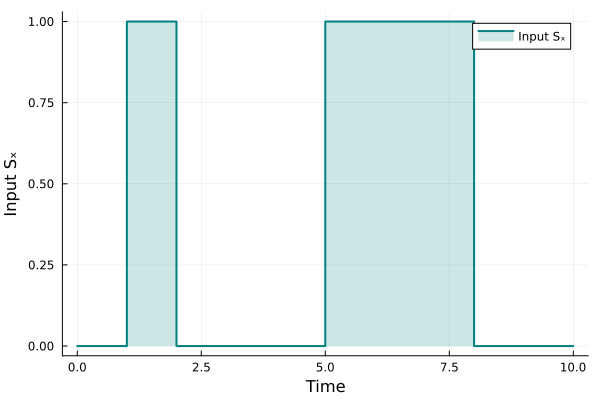

In [219]:
using DifferentialEquations, Plots

# Define the ODE problem
function f(du, u, p, t)
    # No actual dynamics, just a placeholder
    du[1] = 0
end

# Initial condition
u0 = [0.0]  # Initial value of the input

# Define the time span
tspan = (0.0, 10.0)  # Adjust the time span as needed

# Define condition for the callback (times when input changes)
condition1(u, t, integrator) = abs(t - 1.0) < 1e-3  # First spike at t=1
condition2(u, t, integrator) = abs(t - 2.0) < 1e-3  # End of first spike at t=2
condition3(u, t, integrator) = abs(t - 5.0) < 1e-3  # Second spike at t=5
condition4(u, t, integrator) = abs(t - 8.0) < 1e-3  # End of second spike at t=8

# Affect function to change input value
function affect1!(integrator)
    integrator.u[1] = 1.0  # Set input to 1
end
function affect2!(integrator)
    integrator.u[1] = 0.0  # Reset input to 0
end

# Create callbacks
cb1 = DiscreteCallback(condition1, affect1!)
cb2 = DiscreteCallback(condition2, affect2!)
cb3 = DiscreteCallback(condition3, affect1!)
cb4 = DiscreteCallback(condition4, affect2!)

# Combine callbacks
callback = CallbackSet(cb1, cb2, cb3, cb4)

# Solve the ODE
prob = ODEProblem(f, u0, tspan)
sol = solve(prob, Tsit5(), callback=callback, tstops=[1.0, 2.0, 5.0, 8.0])

# Plotting the results
plot(sol.t, [u[1] for u in sol.u], label="Input Sₓ", lw=2, xlabel="Time", ylabel="Input Sₓ", fillrange=0, fillalpha=0.2, c=:teal)


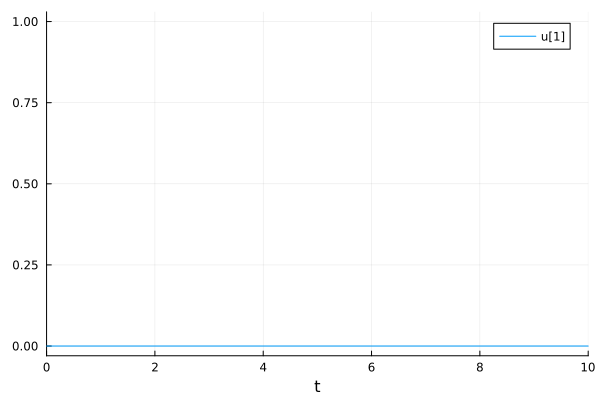

In [218]:
# Plotting the results
plot(sol)